In [0]:
import zipfile
import os

#for unzipping files
#!unzip -q "/content/drive/My Drive/cellzip.zip"



In [0]:
data_dir='/content/cell_images'

os.listdir(data_dir)

['train', 'test']

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 #for importing real images

from matplotlib.image import imread



In [0]:
test_path=data_dir+'/test/'
train_path=data_dir+'/train/'

test_path

'/content/cell_images/test/'

In [0]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [0]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [0]:
os.listdir(train_path+'parasitized')

['C59P20thinF_IMG_20150803_113051_cell_162.png',
 'C136P97ThinF_IMG_20151005_141321_cell_98.png',
 'C182P143NThinF_IMG_20151201_171836_cell_169.png',
 'C100P61ThinF_IMG_20150918_145042_cell_167.png',
 'C180P141NThinF_IMG_20151201_163848_cell_141.png',
 'C184P145ThinF_IMG_20151203_104334_cell_2.png',
 'C59P20thinF_IMG_20150803_113139_cell_27.png',
 'C132P93ThinF_IMG_20151004_152353_cell_136.png',
 'C141P102ThinF_IMG_20151005_215348_cell_132.png',
 'C48P9thinF_IMG_20150721_161055_cell_176.png',
 'C172P133ThinF_IMG_20151119_154936_cell_260.png',
 'C124P85ThinF_IMG_20151002_154808_cell_140.png',
 'C120P81ThinF_IMG_20151002_130918_cell_206.png',
 'C118P79ThinF_IMG_20151002_110725_cell_137.png',
 'C182P143NThinF_IMG_20151201_172216_cell_163.png',
 'C174P135NThinF_IMG_20151127_135342_cell_225.png',
 'C137P98ThinF_IMG_20151005_160256_cell_63.png',
 'C116P77ThinF_IMG_20150930_171635_cell_96.png',
 'C66P27N_ThinF_IMG_20150818_164408_cell_155.png',
 'C39P4thinF_original_IMG_20150622_111206_cell_8

In [0]:
para_cell=train_path+'parasitized/'+'C167P128ReThinF_IMG_20151201_105707_cell_226.png'

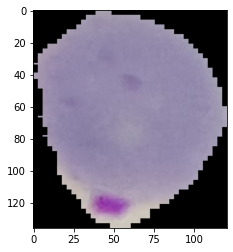

In [0]:
plt.imshow(imread(para_cell))

In [0]:
os.listdir(train_path+'uninfected')

['C117P78ThinF_IMG_20150930_221048_cell_47.png',
 'C154P115ThinF_IMG_20151115_141837_cell_142.png',
 'C74P35_ThinF_IMG_20150815_114555_cell_53.png',
 'C129P90ThinF_IMG_20151004_134306_cell_3.png',
 'C188P149ThinF_IMG_20151203_135433_cell_20.png',
 'C181P142ThinF_IMG_20151127_160539_cell_50.png',
 'C61P22N_ThinF_IMG_20150818_112626_cell_59.png',
 'C37BP2_thinF_IMG_20150620_133111a_cell_16.png',
 'C212ThinF_IMG_20151106_105941_cell_110.png',
 'C49P10thinF_IMG_20150724_103233_cell_18.png',
 'C208ThinF_IMG_20151029_155436_cell_187.png',
 'C95P56ThinF_IMG_20150821_171603_cell_35.png',
 'C112P73ThinF_IMG_20150930_131659_cell_143.png',
 'C158P119ThinF_IMG_20151115_181859_cell_45.png',
 'C49P10thinF_IMG_20150724_102951_cell_134.png',
 'C124P85ThinF_IMG_20151002_154846_cell_30.png',
 'C111P72ThinF_IMG_20150930_113210_cell_4.png',
 'C175P136NThinF_IMG_20151127_142009_cell_17.png',
 'C89P50ThinF_IMG_20150820_162504_cell_28.png',
 'C174P135NThinF_IMG_20151127_135512_cell_34.png',
 'C101P62ThinF_IM

In [0]:
uninfected_cell=train_path+'uninfected/'+'C214ThinF_IMG_20151106_114526_cell_49.png'

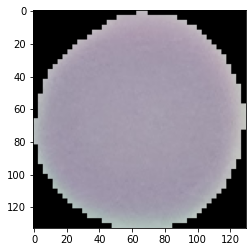

In [0]:
plt.imshow(imread(uninfected_cell))

In [0]:
pwd

'/content'

In [0]:

#number of pics in each category

len(os.listdir(train_path+'parasitized'))


12480

In [0]:
len(os.listdir(train_path+'uninfected'))

12480

In [0]:
len(os.listdir(test_path+'parasitized'))

1300

In [0]:
len(os.listdir(test_path+'uninfected'))

1300

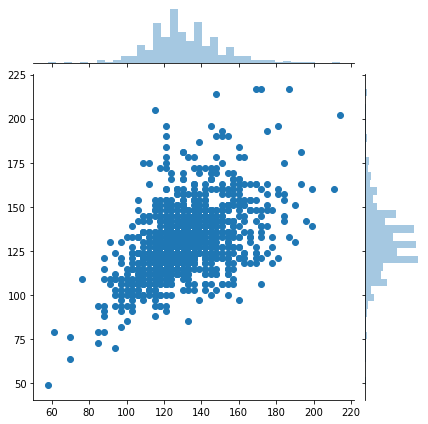

In [0]:
#observing the size of each image in the data set

dim1=[]
dim2=[]

for image_filename in os.listdir(test_path+'uninfected'):
  img = imread(test_path+   'uninfected/'    + image_filename)
  d1,d2,colors=img.shape
  dim1.append(d1)
  dim2.append(d2)

sns.jointplot(dim1,dim2)



In [0]:
#image reshaping

image_shape=(130,130,3)

In [0]:
 #mean dim chosen for training 130*130
 #training on different sizes not possible

In [0]:
#too big hence it will be fed in batches


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
imread(uninfected_cell).max()

0.7882353

In [0]:
image_gen = ImageDataGenerator( 
    rotation_range=20,#for random 
    #rotations in the data set higher values for circular images and lower value for images with distictive faces and features
    width_shift_range=0.1,
    height_shift_range=0.1,
    # if the images were in the scale of 0-255 then 
    #rescale=1/255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
)

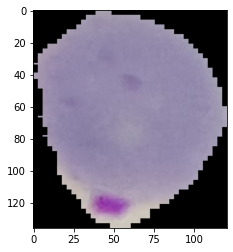

In [0]:
 para_cell=imread(para_cell
 plt.imshow(para_cell)

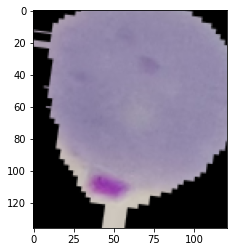

In [0]:
#this way the data set is agumented to improve the performance
plt.imshow(image_gen.random_transform(para_cell))

In [0]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [0]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [0]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten


model=Sequential()
#convolutional layer more added since more information is transfered

# for number of convolution layers in the https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters
model.add(
    Conv2D(
        filters=32,
        kernel_size=(2,2)
        ,strides=(1,1),
        input_shape=image_shape,
        activation='relu',
        ))


#pooling layer
#pool size is generaly half of kernel size
model.add(MaxPool2D(
    pool_size=(1,1)
))



model.add(
    Conv2D(
        filters=64,
        kernel_size=(2,2)
        ,strides=(1,1),
        input_shape=(32,32,3),
        activation='relu',
        ))

model.add(MaxPool2D(
    pool_size=(2,2)
))




model.add(
    Conv2D(
        filters=86,
        kernel_size=(2,2)
        ,strides=(1,1),
        input_shape=(32,32,3),
        activation='relu',
        ))

model.add(MaxPool2D(
    pool_size=(1,1)
))








#now flaten out layers and add a dense layer

model.add(Flatten())
#ONE DENSE LAYER IN THE SAME SCALE AS 32*32*3 more neurons added
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
#final output layer
 # no of neurons = one per class for classification problem
 #softmax for multiclass problem
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',
              metrics=['accuracy']
              )


In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 129, 129, 32)      416       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 129, 129, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 128, 128, 64)      8256      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 63, 63, 86)        22102     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 63, 63, 86)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 341334)           

In [0]:
batch_size=100

train_image_gen= image_gen.flow_from_directory(
                                               train_path,
                                               target_size=(130,130),
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

#test data must not be shuffled

test_image_gen= image_gen.flow_from_directory(test_path,
                                               target_size=(130,130),
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                              shuffle=False,
                                              class_mode='binary'
                                              )

Found 24958 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.


In [0]:
# index names

train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [0]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=1)


In [0]:
results=model.fit_generator(
  train_image_gen,
  
    epochs=20,
    validation_data=test_image_gen,
    callbacks=[early_stop],
    )

Epoch 1/20
250/250 [==============================] - 138s 552ms/step - loss: 26.4229 - accuracy: 0.7389 - val_loss: 0.3238 - val_accuracy: 0.9138
Epoch 2/20
250/250 [==============================] - 137s 547ms/step - loss: 0.3216 - accuracy: 0.9143 - val_loss: 0.2627 - val_accuracy: 0.9315
Epoch 3/20
250/250 [==============================] - 136s 546ms/step - loss: 0.2797 - accuracy: 0.9243 - val_loss: 0.2825 - val_accuracy: 0.9150


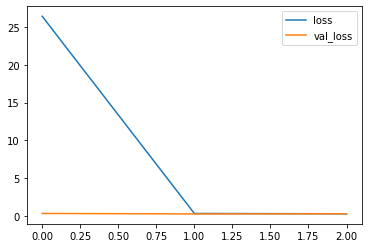

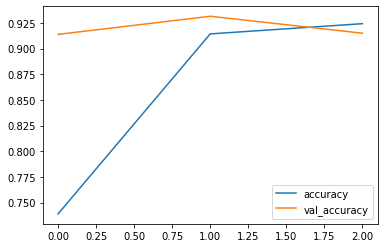

In [0]:
metrics=pd.DataFrame(model.history.history)
metrics[['loss','val_loss']].plot()

metrics[['accuracy','val_accuracy']].plot()

In [0]:
pred = model.predict(test_image_gen)
predictions=pred>0.5 #probability of more than 50 percent is taken as true


In [0]:
len(pred)

2600

In [0]:

from sklearn.metrics import classification_report,confusion_matrix

# predictions=model.predict_classes(x)
# confusion_matrix(y_test,predictions)

print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.96      0.85      0.91      1300
           1       0.87      0.97      0.92      1300

    accuracy                           0.91      2600
   macro avg       0.92      0.91      0.91      2600
weighted avg       0.92      0.91      0.91      2600



In [0]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1111,  189],
       [  43, 1257]])

In [0]:
from tensorflow.keras.preprocessing import image

my_image=image.load_img(uninfected_cell,target_size=(130,130))

In [0]:
my_image_arr=image.img_to_array(my_image)

In [0]:
my_image_arr

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [0]:
my_image_arr=np.expand_dims(my_image_arr,axis=0) #reshaping the image to batch of one image 
#necessary to feed into the model

In [0]:
model.predict(my_image_arr)

array([[0.99514693]], dtype=float32)

In [0]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}